In [438]:
%matplotlib inline
%env CUDA_VISIBLE_DEVICES = 1

env: CUDA_VISIBLE_DEVICES=1


In [439]:
%run mylibrary.ipynb

env: CUDA_VISIBLE_DEVICES=1


In [518]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import math
import random

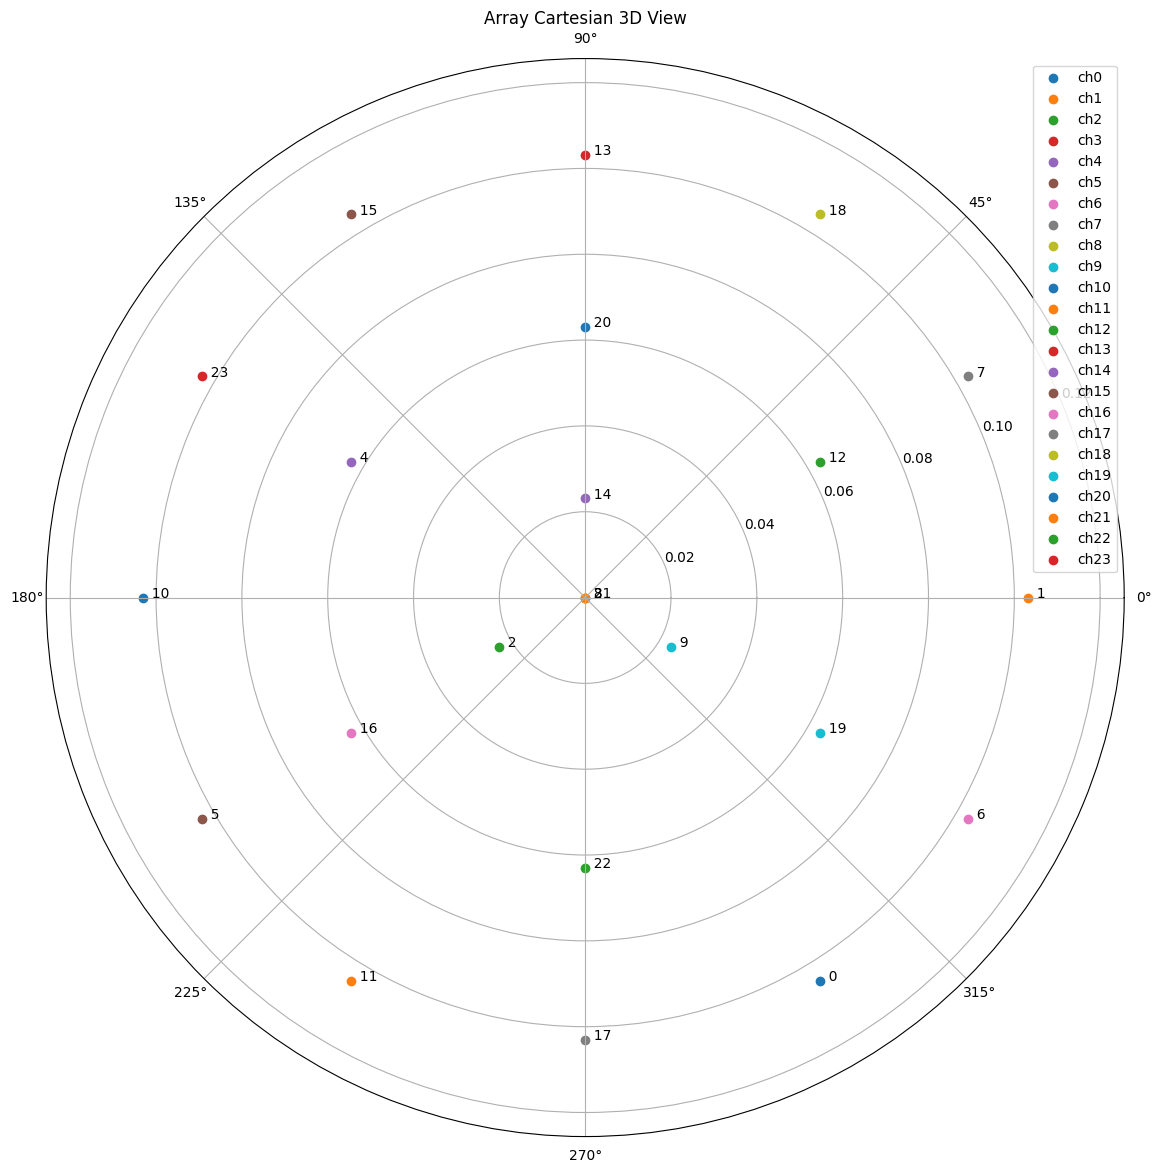

In [516]:
geometry = pd.read_csv('../AA_geometry.tsv', header=None, sep='\t')
AA_Geometry = geometry.to_numpy()
visualizer = Visualizer(AA_Geometry)
visualizer.polar()

In [7]:
class MyModel(tf.keras.Model):
    # Todo
    # Include: batch normalization
    def __init__(self, n_channels):
        super().__init__()
        self.net = tf.keras.Sequential([
            tf.keras.layers.Input(n_channels),
            tf.keras.layers.Dense(units=16, activation='relu'),
            tf.keras.layers.Dense(units=8, activation='relu'),
            tf.keras.layers.Dense(units=1, activation = 'linear')
        ])

    def call(self, inputs):
        return self.net(inputs)

In [522]:
np.empty([10])

array([0.001 , 0.002 , 0.0025, 0.005 , 0.01  , 0.02  , 0.025 , 0.05  ,
       0.1   , 0.2   ])

In [ ]:
def genRandomAA(num_channels, list_length):
    list_channels = np.empty([list_length])
    for channels in list_channels:
        channels = random.sample((0,24), num_channels)
    return list_channels

In [444]:
# Extract data from files
data = DataExtract("../data/rss45/", 24)
inputs = data.get_delays()
labels = data.get_angles()

['random_signal_source_info_0.dat', 'random_signal_source_info_1.dat', 'random_signal_source_info_2.dat', 'random_signal_source_info_3.dat', 'random_signal_source_info_4.dat']
['random_signal_source_info_0_tau.bin', 'random_signal_source_info_1_tau.bin', 'random_signal_source_info_2_tau.bin', 'random_signal_source_info_3_tau.bin', 'random_signal_source_info_4_tau.bin']


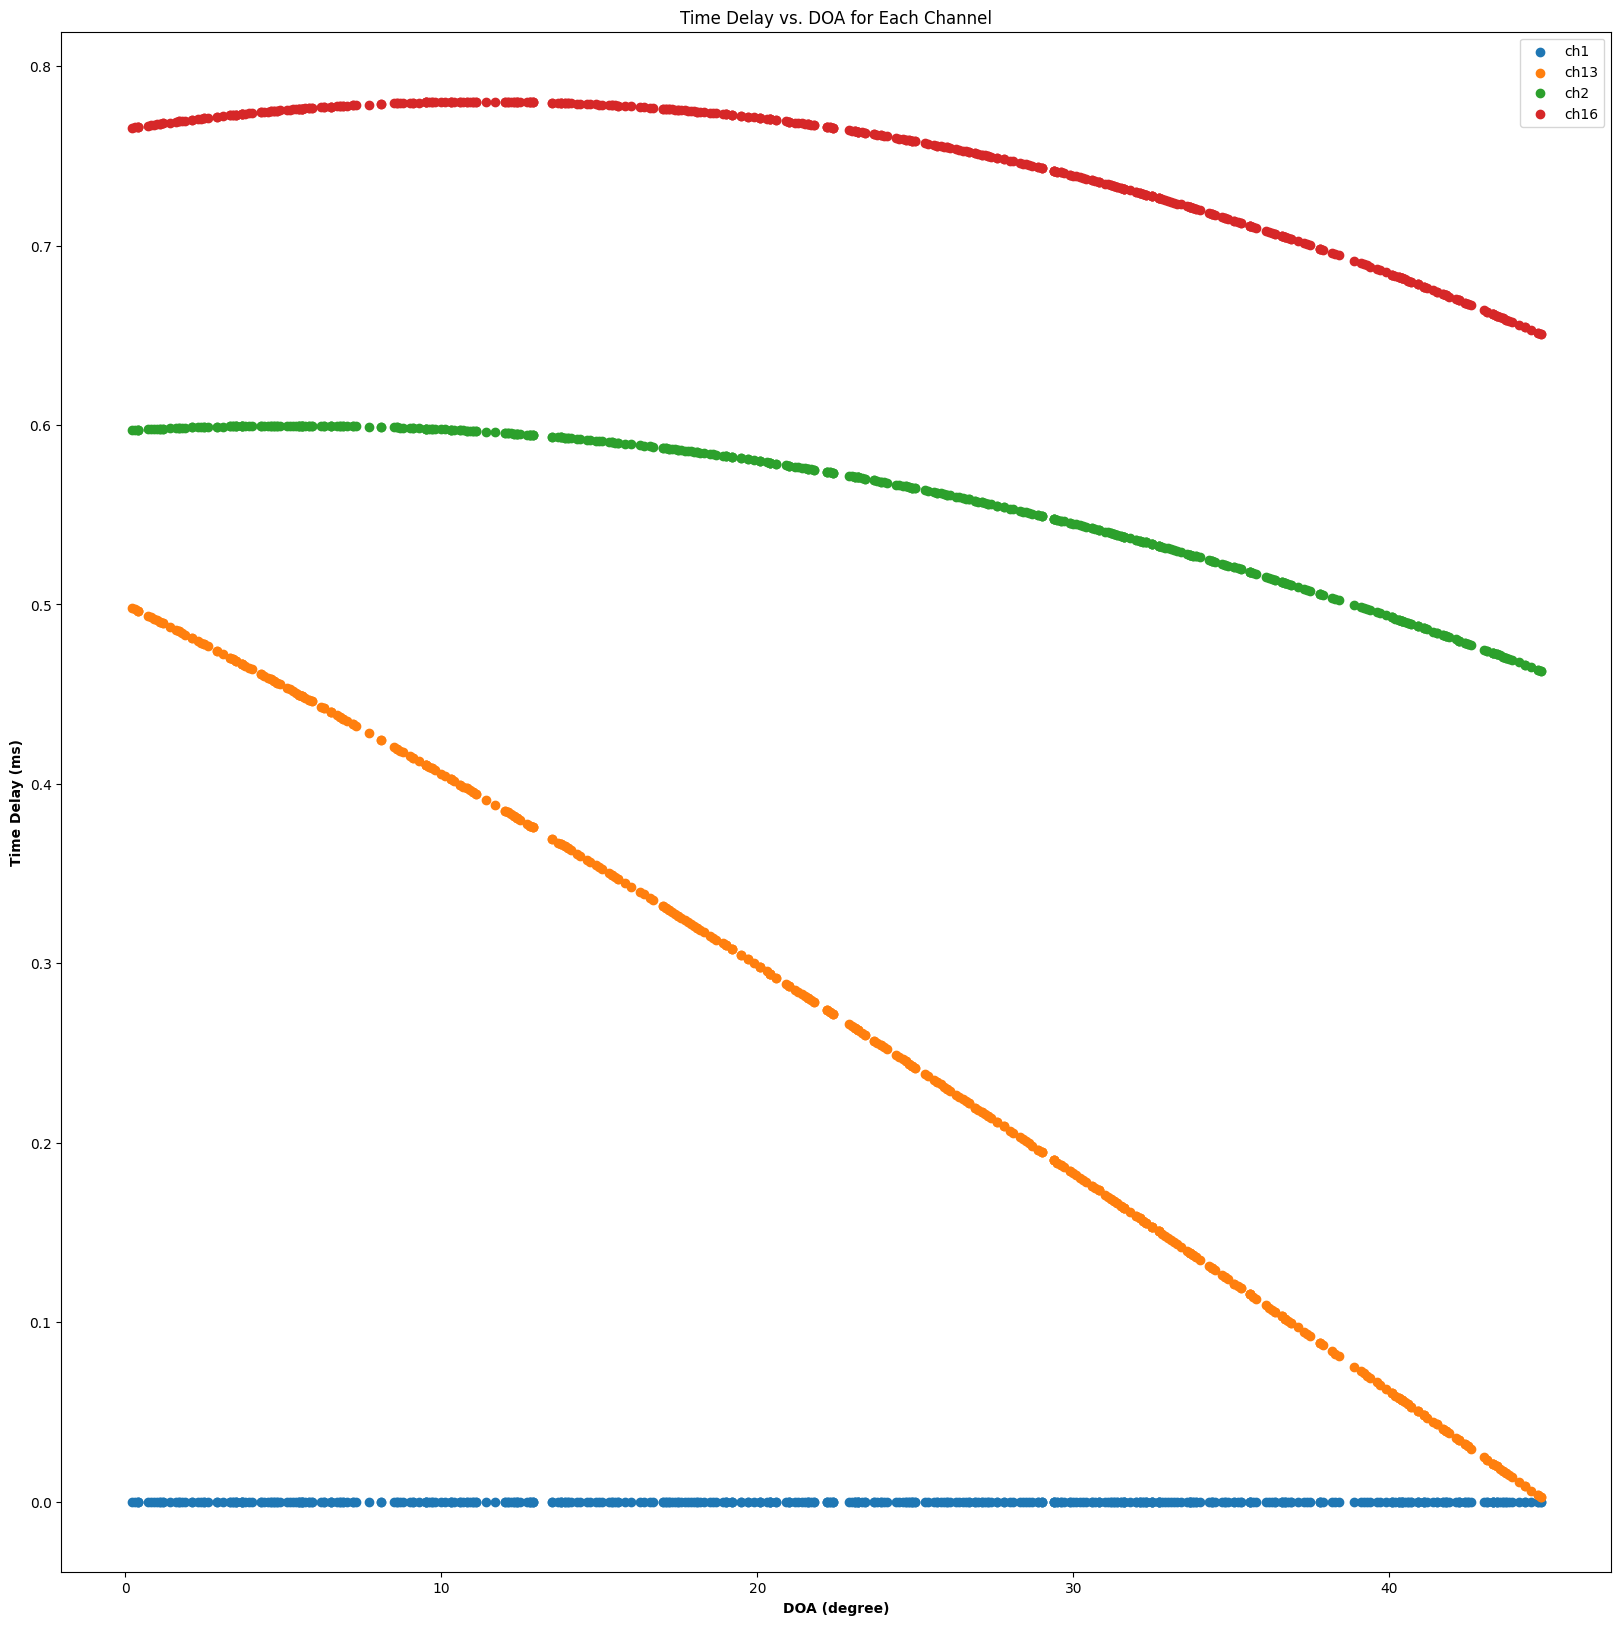

In [445]:
channel_id = [1,13,2,16]
dataset = DataSetPacker(inputs, labels, channel_id)
dataset.plot()

In [446]:
train_dataset, val_dataset, test_dataset = dataset.split()

In [460]:
model = MyModel(np.shape(channel_id))

model = tf.keras.Sequential([
    tf.keras.layers.Input(np.shape(channel_id)),
    tf.keras.layers.Dense(units=16, activation='gelu'),
    tf.keras.layers.Dense(units=8, activation='gelu'),
    #tf.keras.layers.Dense(units=4, activation='gelu'),
    tf.keras.layers.Dense(units=1, activation = 'linear')
])


In [461]:
model.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])

In [462]:
losses = model.fit(train_dataset.batch(8), epochs=100, validation_data = val_dataset.batch(8))

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 717.9627 - mae: 23.5697 - mse: 717.9627 - val_loss: 691.3873 - val_mae: 22.9137 - val_mse: 691.3873
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 703.3035 - mae: 23.2324 - mse: 703.3035 - val_loss: 678.8394 - val_mae: 22.6005 - val_mse: 678.8394
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 689.7734 - mae: 22.9271 - mse: 689.7734 - val_loss: 653.1127 - val_mae: 22.0403 - val_mse: 653.1127
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 661.4237 - mae: 22.3256 - mse: 661.4237 - val_loss: 607.7056 - val_mae: 20.9860 - val_mse: 607.7056
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 612.0912 - mae: 21.1377 - mse: 612.0912 - val_loss: 546.5685 - val_mae: 19.6310 - val_mse: 546.5685
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 541.5958 - mae: 19.5361 - mse: 541.5958 - val_loss: 468.2231 - val_mae: 17.9547 - val_mse: 468.2231
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

In [493]:
losses.history.keys()

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])

Text(0, 0.5, 'mae')

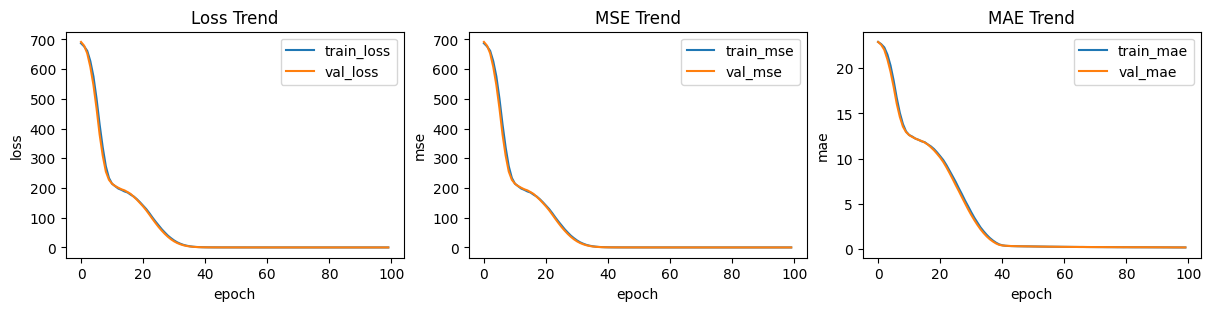

In [513]:
metrics_len = len(losses.history)
fig, axs = plt .subplots(ncols = 3, nrows=1, figsize=(12,3), layout="constrained")
axs[0].plot(losses.history['loss'], label='train_loss')
axs[0].plot(losses.history['val_loss'], label='val_loss')
axs[1].plot(losses.history['mse'], label='train_mse')
axs[1].plot(losses.history['val_mse'], label='val_mse')
axs[2].plot(losses.history['mae'], label='train_mae')
axs[2].plot(losses.history['val_mae'], label='val_mae')
axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[0].set_title("Loss Trend")
axs[1].set_title("MSE Trend")
axs[2].set_title("MAE Trend")
axs[0].set_xlabel("epoch")
axs[1].set_xlabel("epoch")
axs[2].set_xlabel("epoch")
axs[0].set_ylabel("loss")
axs[1].set_ylabel("mse")
axs[2].set_ylabel("mae")
    

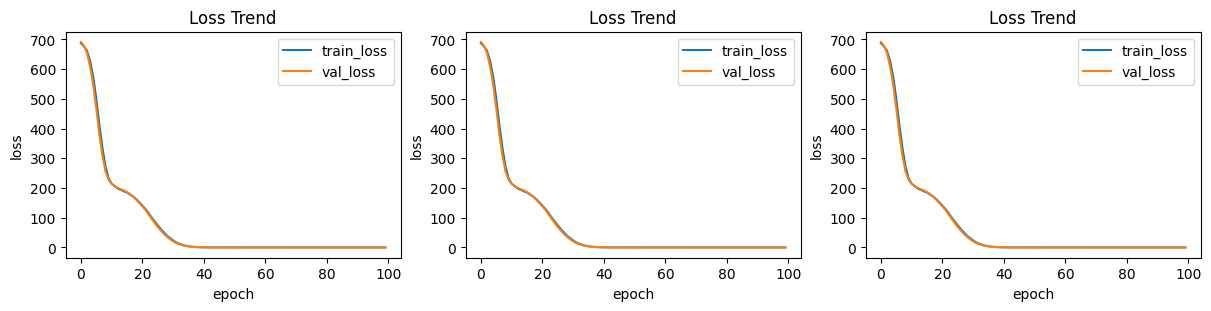

In [515]:
metrics_len = len(losses.history)
fig, axs = plt .subplots(ncols = 3, nrows=1, figsize=(12,3), layout="constrained")
for i in range(3):
    axs[i].plot(losses.history['loss'], label='train_loss')
    axs[i].plot(losses.history['val_loss'], label='val_loss')
    axs[i].legend()
    axs[i].set_title("Loss Trend")
    axs[i].set_xlabel("epoch")
    axs[i].set_ylabel("loss")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


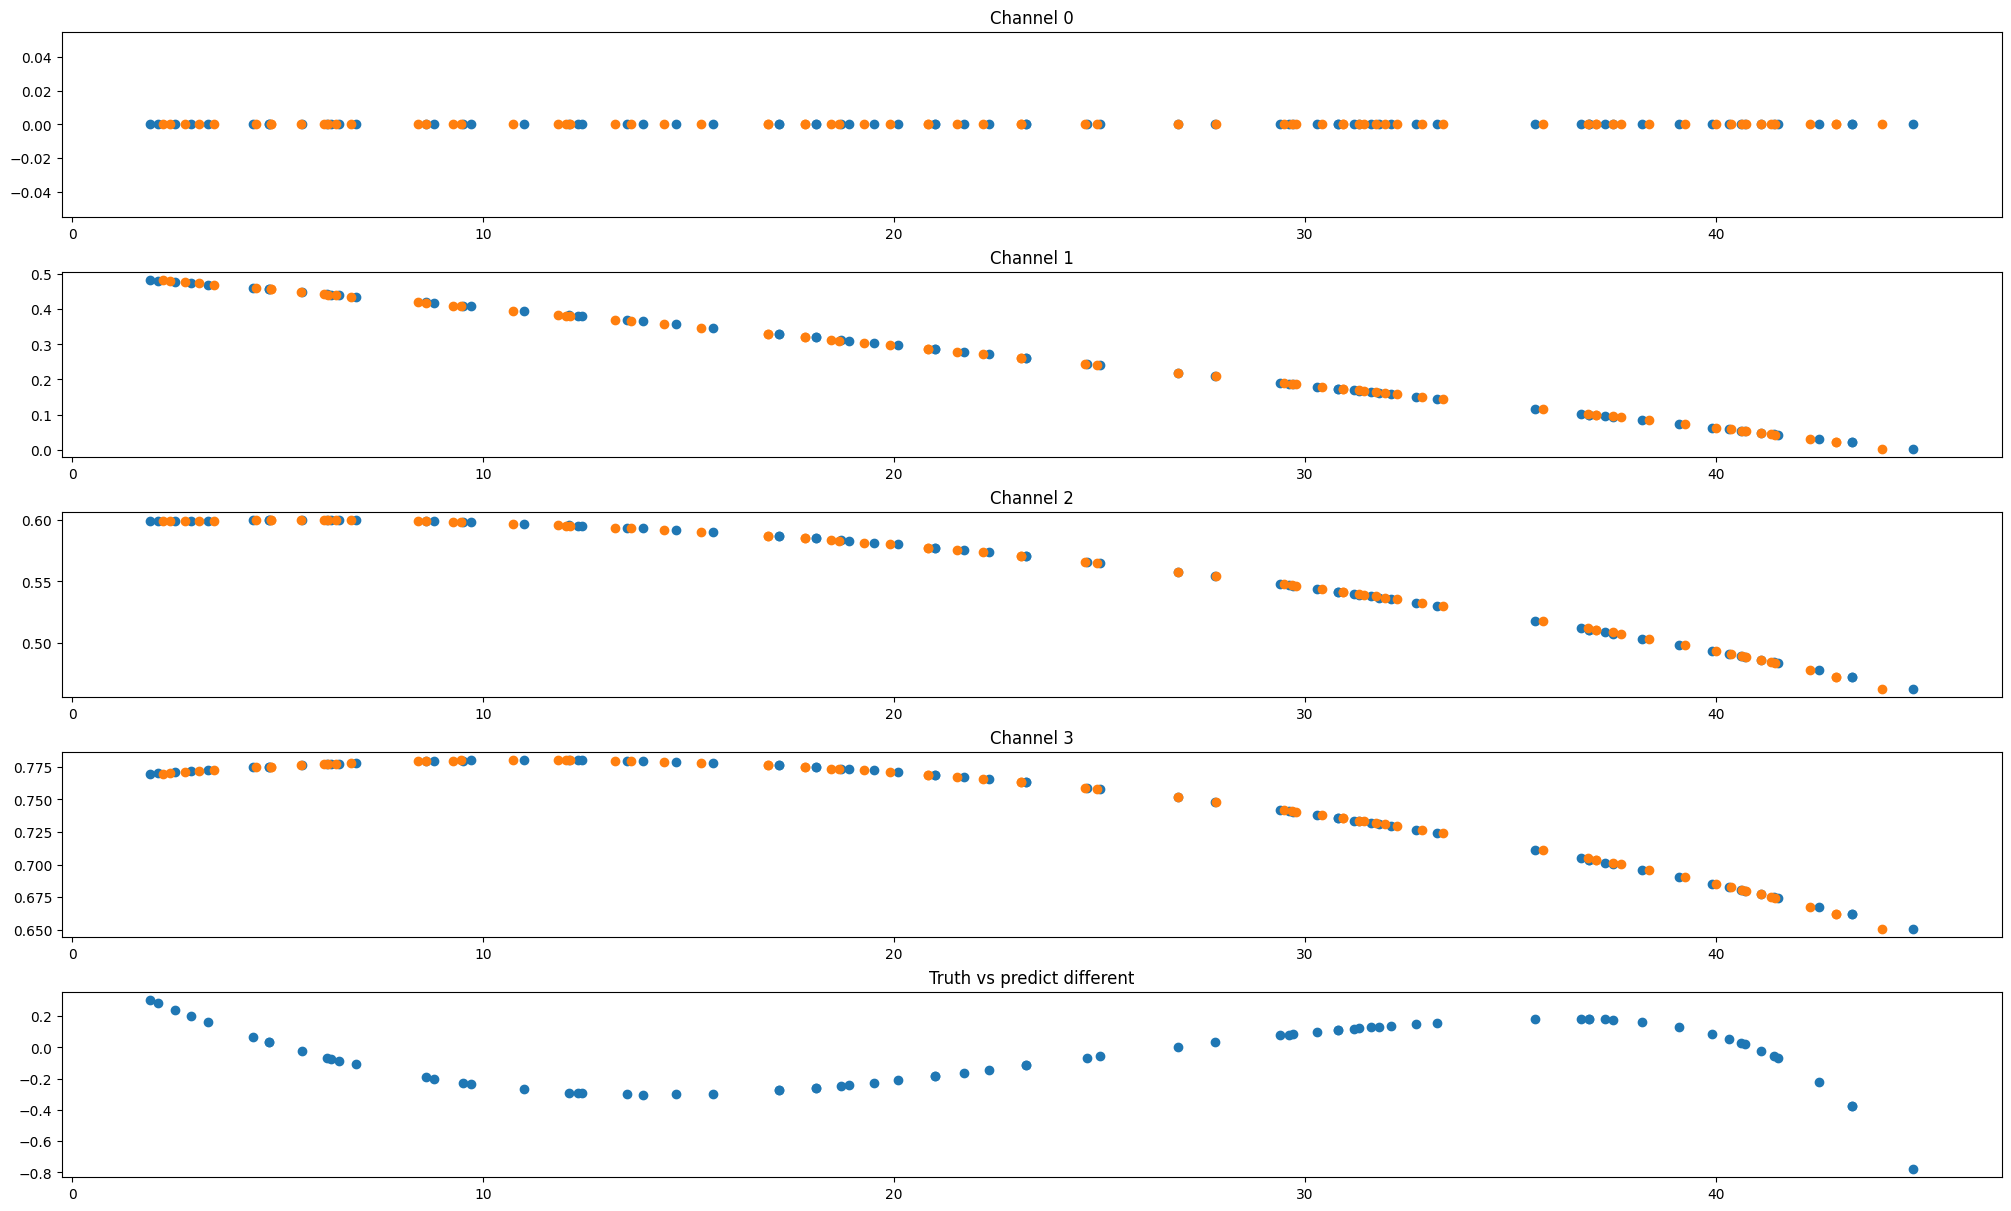

In [464]:
fig, axs = plt.subplots(ncols = 1, nrows = len(channel_id) + 1, figsize = (20,len(channel_id)*3), layout="constrained")
for x,y in test_dataset.batch(100):
    for i in range(x.shape[1]):
        axs[i].scatter(y, x[:,i])
        axs[i].scatter(model.predict(x), x[:,i])
        axs[i].set_title("Channel {}".format(i))
    axs[-1].scatter(y, model.predict(x) - y)
    axs[-1].set_title("Truth vs predict different")

In [255]:
x = test_dataset.take(1)

In [257]:
i, label=list(x.as_numpy_iterator())[0][0], list(x.as_numpy_iterator())[0][1]

In [258]:
i = i.reshape(-1,4)
i

array([[ 0.        , -0.11550159, -0.11092727,  0.04316626]],
      dtype=float32)

In [260]:
model.predict(i), label

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


(array([[41.5511]], dtype=float32), array([41.5], dtype=float32))

In [509]:
model.evaluate(test_dataset.batch(100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0440 - mae: 0.1754 - mse: 0.0440


[0.04399072378873825, 0.04399072378873825, 0.17539508640766144]